<h2><b>Laptop Price Prediction

<h4><b>Importing Libraries

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h4><b>Reading Data from the Dataset

In [163]:
lap=pd.read_csv('laptop_data.csv')

In [164]:
lap.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


<h4><b>Data Information</h4>

In [165]:
lap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [166]:
lap.shape

(1303, 12)

<h4><b>Data Preprocessing

<h5><b>Checking for Null Values

In [167]:
lap.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

<h5><b>Checking for Repeated Values

In [168]:
lap.duplicated().sum()

np.int64(0)

In [169]:
lap.drop(columns=['Unnamed: 0'],inplace=True)

In [170]:
lap.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


<h5><b>Feature Engineering

In [171]:
lap['Ram']=lap['Ram'].str.replace('GB','').astype('int32')
lap['Weight']=lap['Weight'].str.replace('kg','').astype('float32')

In [172]:
lap.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


<h5><b>Analyzing Data

In [173]:
import seaborn as sns

<Axes: xlabel='Price', ylabel='Count'>

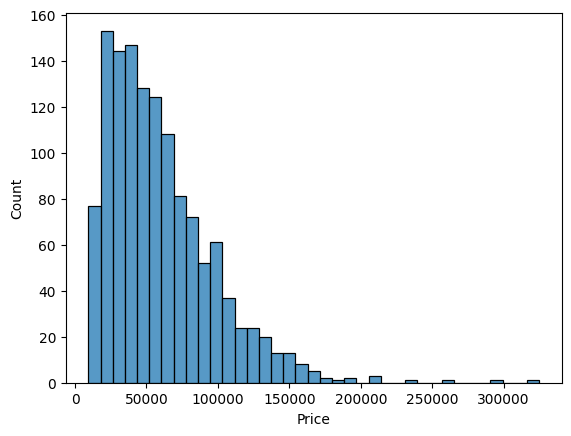

In [174]:
sns.histplot(lap['Price'])

<h5><b>Price column has Skewed Data</h5>

<Axes: xlabel='Company'>

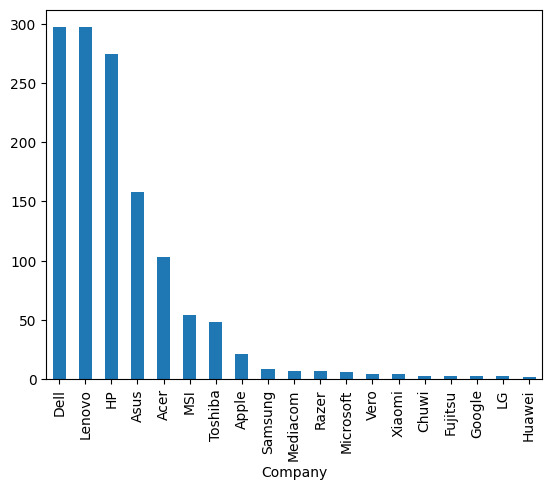

In [175]:
lap['Company'].value_counts().plot(kind='bar')

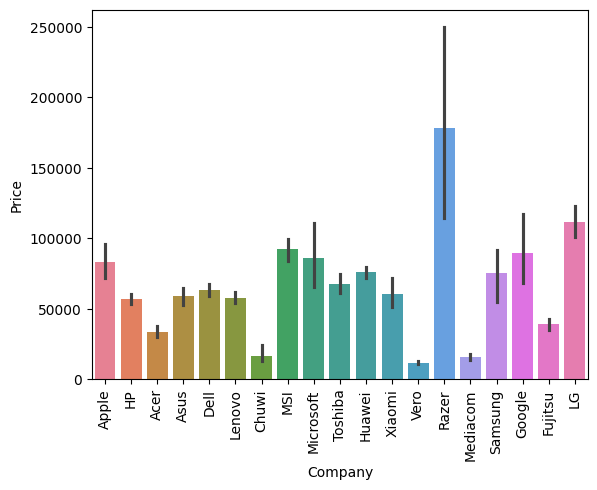

In [176]:
sns.barplot(x=lap['Company'],y=lap['Price'],hue=lap['Company'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

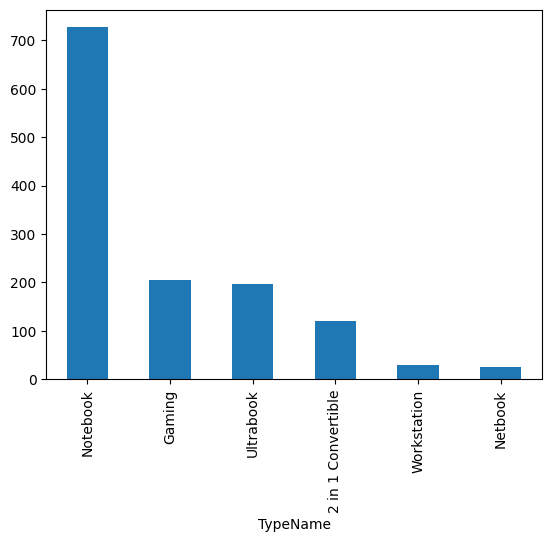

In [177]:
lap['TypeName'].value_counts().plot(kind='bar')

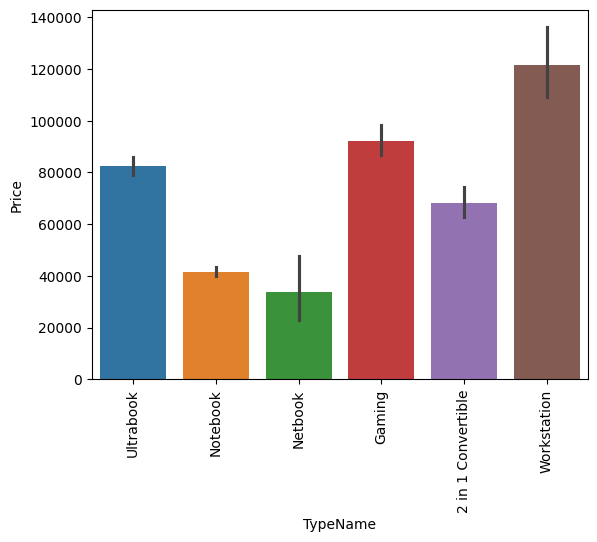

In [178]:
sns.barplot(x=lap['TypeName'],y=lap['Price'],hue=lap['TypeName'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\kamil\AppData\Local\Temp\ipykernel_11056\2793967156.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lap['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

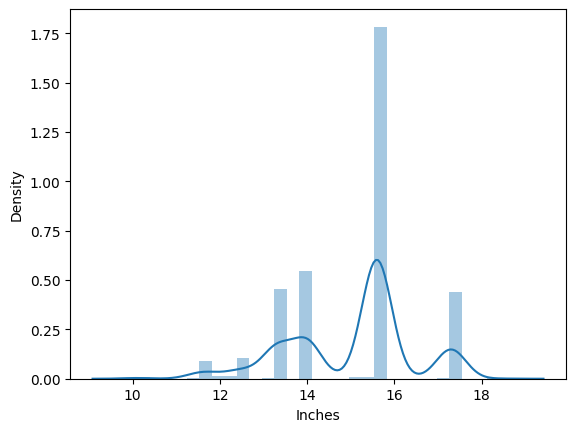

In [179]:
sns.distplot(lap['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

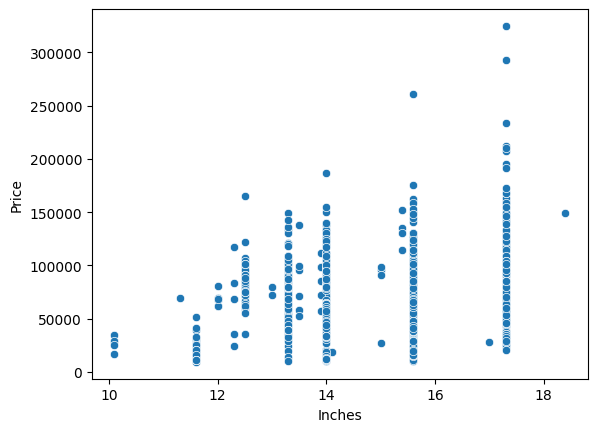

In [180]:
sns.scatterplot(x=lap['Inches'],y=lap['Price'])

<h5><b>Feature Engneering on 'ScreenResoultion' Column

In [181]:
lap['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

In [182]:
lap['TouchScreen']=lap['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

<Axes: xlabel='TouchScreen'>

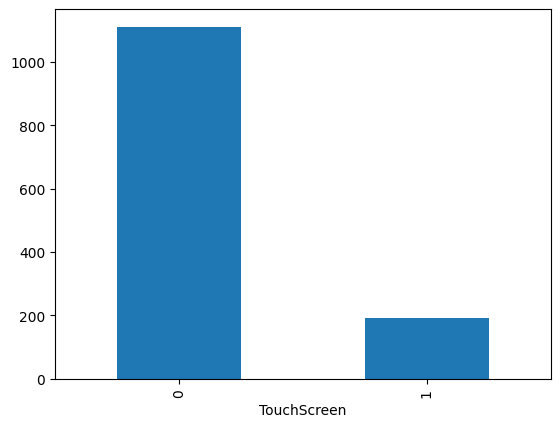

In [183]:
lap['TouchScreen'].value_counts().plot(kind='bar')

<Axes: xlabel='TouchScreen', ylabel='Price'>

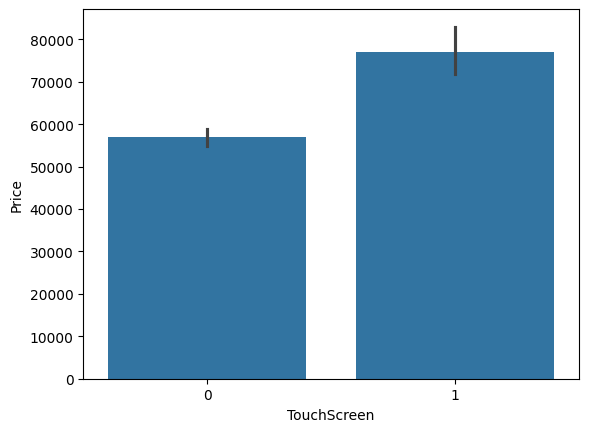

In [184]:
sns.barplot(x=lap['TouchScreen'],y=lap['Price'])

In [185]:
lap['Ips']=lap['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

<Axes: xlabel='Ips'>

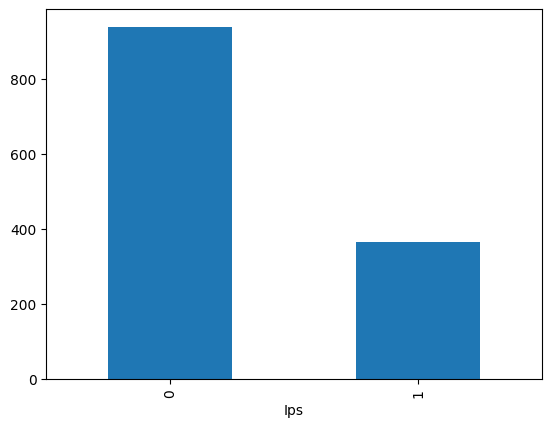

In [186]:
lap['Ips'].value_counts().plot(kind='bar')

<Axes: xlabel='Ips', ylabel='Price'>

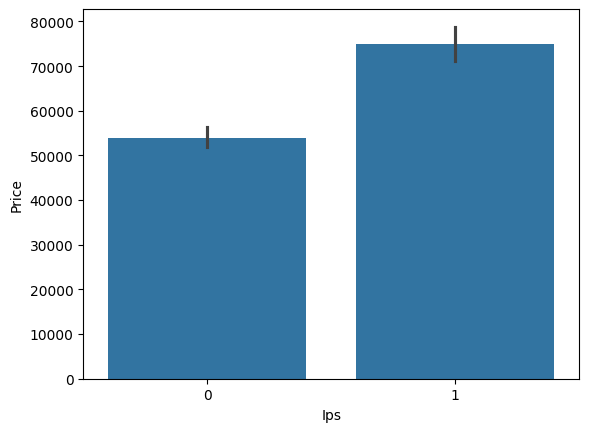

In [187]:
sns.barplot(x=lap['Ips'],y=lap['Price'])

<h5><b>Getting Resolution

In [188]:
new=lap['ScreenResolution'].str.split('x',n=1,expand=True)

In [189]:
lap['X-res']=new[0]
lap['Y-res']=new[1]
lap['X-res']

0               IPS Panel Retina Display 2560
1                                        1440
2                                Full HD 1920
3               IPS Panel Retina Display 2880
4               IPS Panel Retina Display 2560
                        ...                  
1298     IPS Panel Full HD / Touchscreen 1920
1299    IPS Panel Quad HD+ / Touchscreen 3200
1300                                     1366
1301                                     1366
1302                                     1366
Name: X-res, Length: 1303, dtype: object

In [190]:
lap['X-res']=lap['X-res'].str.replace(',','').str.findall(r'[0-9]{3,4}').apply(lambda x:x[0])

In [191]:
lap['X-res']

0       2560
1       1440
2       1920
3       2880
4       2560
        ... 
1298    1920
1299    3200
1300    1366
1301    1366
1302    1366
Name: X-res, Length: 1303, dtype: object

<h4><b>Building 'ppi' column</h4>

In [192]:
lap['X-res']=lap['X-res'].astype('int')
lap['Y-res']=lap['Y-res'].astype('int')

In [193]:
lap['ppi']=(((lap['X-res']**2)+(lap['Y-res']**2))**0.5/lap['Inches']).astype('float')

In [194]:
lap.corr(numeric_only=True)['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
Ips            0.252208
X-res          0.556529
Y-res          0.552809
ppi            0.473487
Name: Price, dtype: float64

<b>We will remove 'Inches' as it's very poorly correlated and 'X-res' 'Y-res' as there is multi-collinearity

In [195]:
lap.drop(columns=['Inches','X-res','Y-res','ScreenResolution'],inplace=True)

<h5><b>Feature Engneering on 'Cpu' Column

In [196]:
lap['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core i5 7200U 2.70GHz        1
Intel Core M M7-6Y75 1.2GHz        1
Intel Core M 6Y54 1.1GHz           1
AMD E-Series 9000 2.2GHz           1
Samsung Cortex A72&A53 2.0GHz      1
Name: count, Length: 118, dtype: int64

In [197]:
lap['Cpu Name']=lap['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [198]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0]=='Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'
    

In [199]:
lap['Cpu_Brand']=lap['Cpu Name'].apply(fetch_processor)

<Axes: xlabel='Cpu_Brand'>

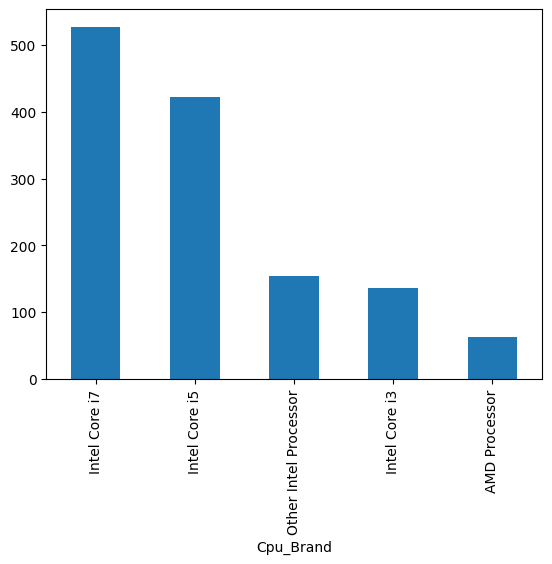

In [200]:
lap['Cpu_Brand'].value_counts().plot(kind='bar')

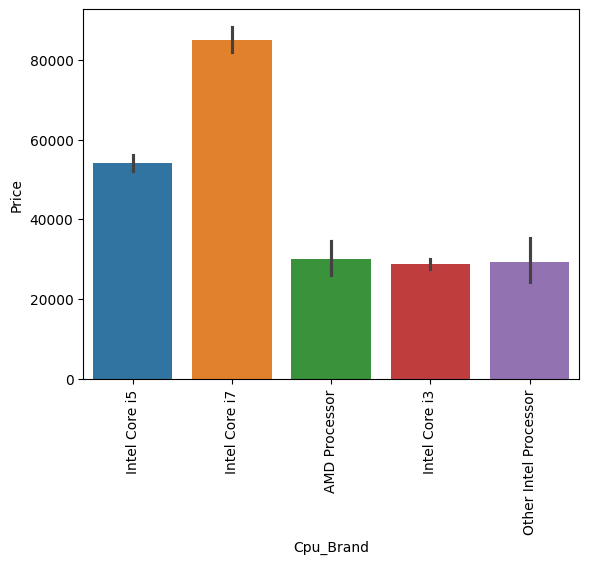

In [201]:
sns.barplot(x=lap['Cpu_Brand'],y=lap['Price'],hue=lap['Cpu_Brand'])
plt.xticks(rotation='vertical')
plt.show()

In [202]:
lap.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [203]:
lap.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu_Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<Axes: xlabel='Ram'>

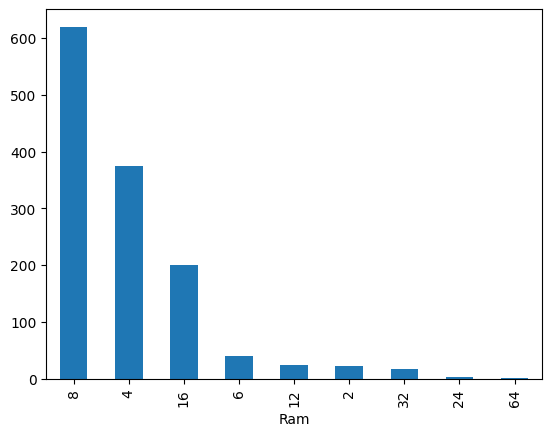

In [204]:
lap['Ram'].value_counts().plot(kind='bar')

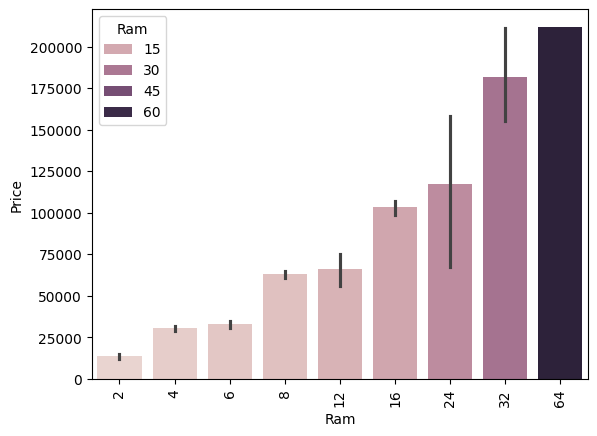

In [205]:
sns.barplot(x=lap['Ram'],y=lap['Price'],hue=lap['Ram'])
plt.xticks(rotation='vertical')
plt.show()

<h5><b>Feature Engineering on 'Memory' Column

In [206]:
lap['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
64GB SSD                       

In [207]:
lap['Memory'] = lap['Memory'].astype(str).replace('\.0', '', regex=True)
print(lap['Memory'])
lap["Memory"] = lap["Memory"].str.replace('GB', '')
lap["Memory"] = lap["Memory"].str.replace('TB', '000')
new = lap["Memory"].str.split("+", n = 1, expand = True)

lap["first"]= new[0]
lap["first"]=lap["first"].str.strip()

lap["second"]= new[1]

lap["Layer1HDD"] = lap["first"].apply(lambda x: 1 if "HDD" in x else 0)
lap["Layer1SSD"] = lap["first"].apply(lambda x: 1 if "SSD" in x else 0)
lap["Layer1Hybrid"] = lap["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
lap["Layer1Flash_Storage"] = lap["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

lap['first'] = lap['first'].str.split(' ').str[0]

lap["second"].fillna("0", inplace = True)

lap["Layer2HDD"] = lap["second"].apply(lambda x: 1 if "HDD" in x else 0)
lap["Layer2SSD"] = lap["second"].apply(lambda x: 1 if "SSD" in x else 0)
lap["Layer2Hybrid"] = lap["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
lap["Layer2Flash_Storage"] = lap["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

lap['second'] = lap['second'].str.strip().str.split(' ').str[0]

lap["first"] = lap["first"].astype(int)
lap["second"] = lap["second"].astype(int)

lap["HDD"]=(lap["first"]*lap["Layer1HDD"]+lap["second"]*lap["Layer2HDD"])
lap["SSD"]=(lap["first"]*lap["Layer1SSD"]+lap["second"]*lap["Layer2SSD"])
lap["Hybrid"]=(lap["first"]*lap["Layer1Hybrid"]+lap["second"]*lap["Layer2Hybrid"])
lap["Flash_Storage"]=(lap["first"]*lap["Layer1Flash_Storage"]+lap["second"]*lap["Layer2Flash_Storage"])

lap.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)



0                 128GB SSD
1       128GB Flash Storage
2                 256GB SSD
3                 512GB SSD
4                 256GB SSD
               ...         
1298              128GB SSD
1299              512GB SSD
1300     64GB Flash Storage
1301                1TB HDD
1302              500GB HDD
Name: Memory, Length: 1303, dtype: object


<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\kamil\AppData\Local\Temp\ipykernel_11056\420144248.py:1: SyntaxWarning: invalid escape sequence '\.'
  lap['Memory'] = lap['Memory'].astype(str).replace('\.0', '', regex=True)
C:\Users\kamil\AppData\Local\Temp\ipykernel_11056\420144248.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  lap["second"].fillna("0", inplace = True)


In [208]:
lap.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu_Brand,HDD,SSD,Hybrid,Flash_Storage
287,Asus,Ultrabook,8,256 SSD,Nvidia GeForce 940MX,Windows 10,1.7,52054.56,0,0,141.211998,Intel Core i5,0,256,0,0
421,Chuwi,Notebook,6,64 Flash Storage,Intel HD Graphics 500,Windows 10,1.4,23922.72,0,1,267.338436,Other Intel Processor,0,0,0,64
336,Dell,Ultrabook,8,128 SSD + 1000 HDD,Nvidia GeForce 940MX,Windows 10,1.9,55890.72,0,1,141.211998,Intel Core i5,1000,128,0,0
783,Lenovo,Notebook,8,1000 HDD,Intel HD Graphics 405,No OS,2.2,17529.12,0,0,100.454670,Other Intel Processor,1000,0,0,0
1161,MSI,Gaming,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 970M,Windows 10,1.7,94252.32,0,0,157.350512,Intel Core i7,1000,256,0,0


In [209]:
lap.drop(columns=['Memory'],inplace=True)

In [210]:
lap.corr(numeric_only=True)['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
TouchScreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [211]:
lap.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

<h4><b>Feature Engineering on 'Gpu' Column

In [212]:
lap['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia Quadro M500M          1
AMD Radeon R7 M360           1
Nvidia Quadro M3000M         1
Nvidia GeForce 960M          1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [213]:
lap['Gpu']=lap['Gpu'].apply(lambda x:x.split()[0])

In [214]:
lap['Gpu'].value_counts()

Gpu
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [215]:
lap=lap[lap['Gpu'] != 'ARM']

<Axes: xlabel='Gpu', ylabel='Price'>

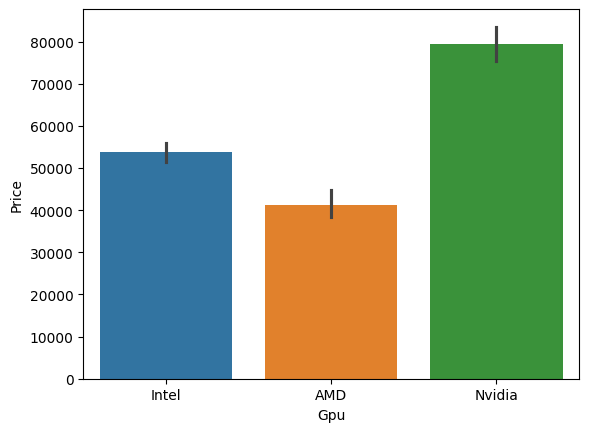

In [216]:
sns.barplot(x=lap['Gpu'],y=lap['Price'],hue=lap['Gpu'])

<h4><b>Feature Engineering on 'OpSys' Column

In [217]:
lap['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

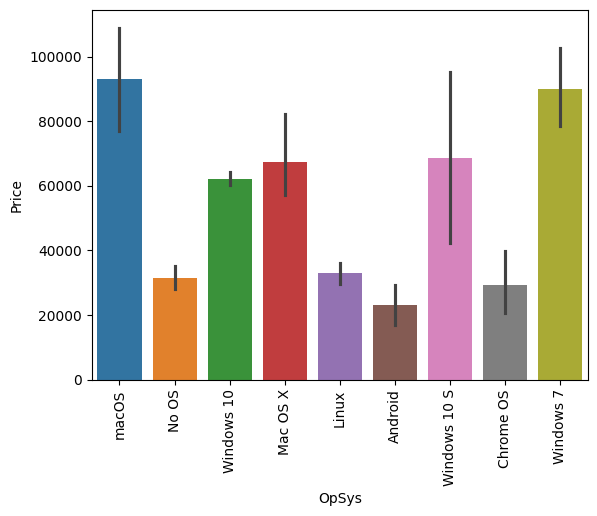

In [218]:
sns.barplot(x=lap['OpSys'],y=lap['Price'],hue=lap['OpSys'])
plt.xticks(rotation='vertical')
plt.show()

In [219]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [220]:
lap['OS']=lap['OpSys'].apply(cat_os)

In [221]:
lap.drop(columns=['OpSys'],inplace=True)

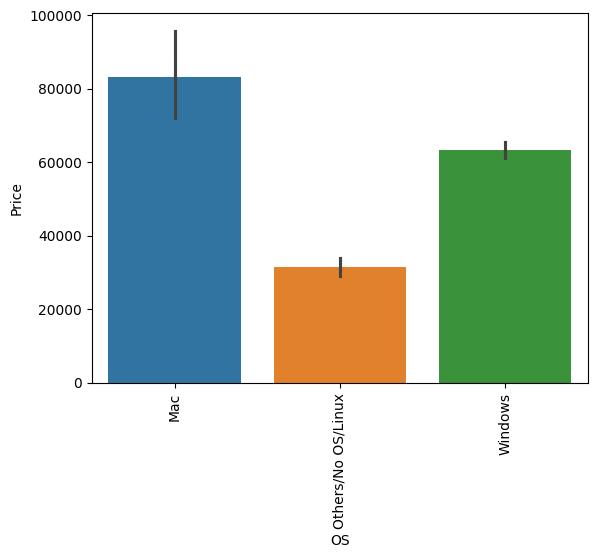

In [222]:
sns.barplot(x=lap['OS'],y=lap['Price'],hue=lap['OS'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\kamil\AppData\Local\Temp\ipykernel_11056\121961253.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lap['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

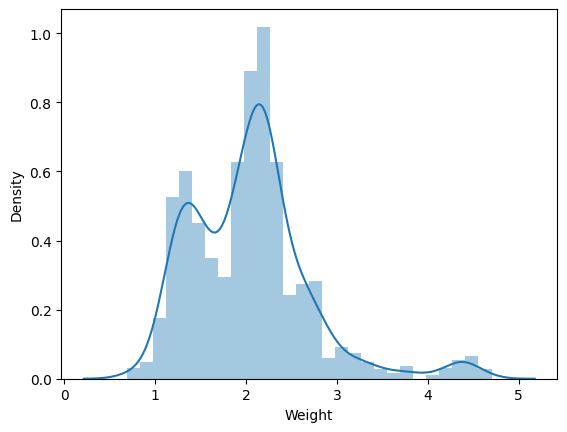

In [223]:
sns.distplot(lap['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

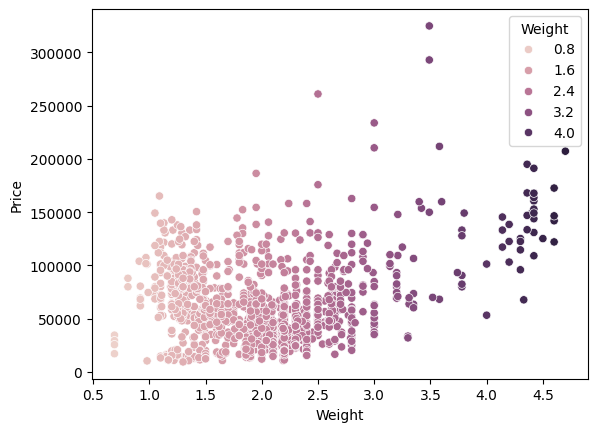

In [224]:
sns.scatterplot(x=lap['Weight'],y=lap['Price'],hue=lap['Weight'])


<h4><b>HeatMap among variables

<Axes: >

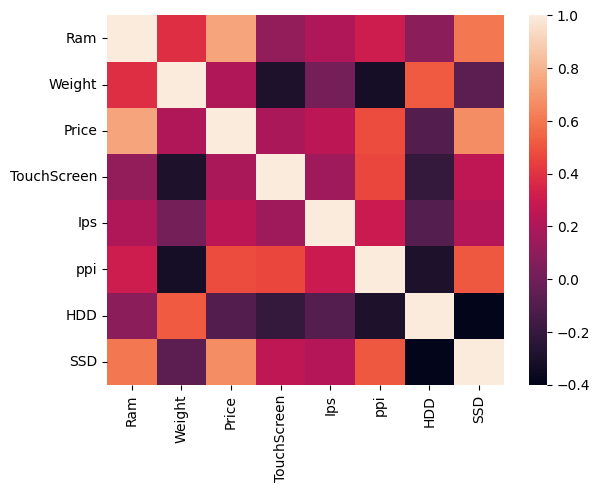

In [225]:
sns.heatmap(lap.corr(numeric_only=True))

<h3><b>Log Transformation on Target Column 'Price' to get Normal Distribution</h3>

C:\Users\kamil\AppData\Local\Temp\ipykernel_11056\3273268303.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(lap['Price']))


<Axes: xlabel='Price', ylabel='Density'>

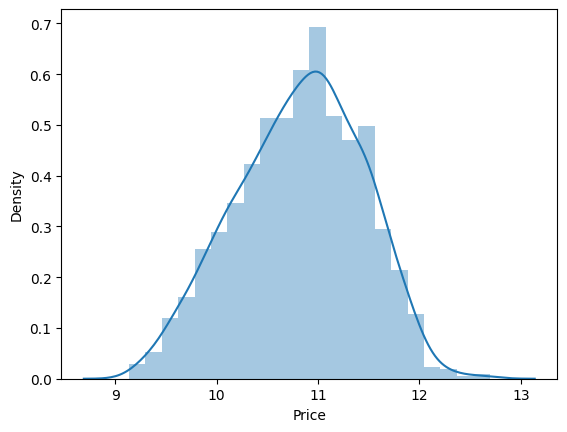

In [226]:
sns.distplot(np.log(lap['Price']))

<h3><b>Standard Scaler

In [227]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
num_col=[]
for col in lap.columns:
    if lap[col].nunique() >5:
        num_col.append(col)
num_col.remove('Price')
num_col.remove('TypeName')
num_col.remove('Company')
print(num_col)
lap[num_col]=st.fit_transform(lap[num_col])

['Ram', 'Weight', 'ppi', 'HDD', 'SSD']


In [228]:
lap.head()

,Company,TypeName,Ram,Gpu,Weight,Price,TouchScreen,Ips,ppi,Cpu_Brand,HDD,SSD,OS
0,Apple,Ultrabook,-0.075850,Intel,-1.006613,71378.6832,0,1,1.867826,Intel Core i5,-0.803003,-0.298956,Mac
1,Apple,Ultrabook,-0.075850,Intel,-1.051725,47895.5232,0,0,-0.438780,Intel Core i5,-0.803003,-0.983823,Mac
2,HP,Notebook,-0.075850,Intel,-0.269791,30636.0000,0,0,-0.124418,Intel Core i5,-0.803003,0.385912,Others/No OS/Linux
3,Apple,Ultrabook,1.497958,AMD,-0.314903,135195.3360,0,1,1.718046,Intel Core i7,-0.803003,1.755647,Mac
4,Apple,Ultrabook,-0.075850,Intel,-1.006613,96095.8080,0,1,1.867826,Intel Core i5,-0.803003,0.385912,Mac


<h2><b>Splitting the Data into Independent And Dependent Variables</h2>

In [229]:
X=lap.drop(columns=['Price'])
Y=np.log(lap['Price'])

In [230]:
X

,Company,TypeName,Ram,Gpu,Weight,TouchScreen,Ips,ppi,Cpu_Brand,HDD,SSD,OS
0,Apple,Ultrabook,-0.075850,Intel,-1.006613,0,1,1.867826,Intel Core i5,-0.803003,-0.298956,Mac
1,Apple,Ultrabook,-0.075850,Intel,-1.051725,0,0,-0.438780,Intel Core i5,-0.803003,-0.983823,Mac
2,HP,Notebook,-0.075850,Intel,-0.269791,0,0,-0.124418,Intel Core i5,-0.803003,0.385912,Others/No OS/Linux
3,Apple,Ultrabook,1.497958,AMD,-0.314903,0,1,1.718046,Intel Core i7,-0.803003,1.755647,Mac
4,Apple,Ultrabook,-0.075850,Intel,-1.006613,0,1,1.867826,Intel Core i5,-0.803003,0.385912,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,-0.862754,Intel,-0.360015,1,1,0.250439,Intel Core i7,-0.803003,-0.298956,Windows
1299,Lenovo,2 in 1 Convertible,1.497958,Intel,-1.111874,1,1,3.007610,Intel Core i7,-0.803003,1.755647,Windows
1300,Lenovo,Notebook,-1.256206,Intel,-0.811130,0,0,-0.804444,Other Intel Processor,-0.803003,-0.983823,Windows
1301,HP,Notebook,-0.469302,AMD,0.226436,0,0,-1.071108,Intel Core i7,1.136142,-0.983823,Windows


In [231]:
Y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

<h3><b>Splitting the data into training and testing data set</h3>

In [232]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15,random_state=2)

In [233]:
X_train

,Company,TypeName,Ram,Gpu,Weight,TouchScreen,Ips,ppi,Cpu_Brand,HDD,SSD,OS
183,Toshiba,Notebook,-0.075850,Intel,-0.059271,0,0,-1.071108,Intel Core i5,-0.803003,-0.298956,Windows
1141,MSI,Gaming,-0.075850,Nvidia,0.542216,0,0,-0.124418,Intel Core i7,1.136142,-0.298956,Windows
1049,Asus,Netbook,-0.862754,Intel,-1.262245,0,0,-0.266519,Other Intel Processor,-0.803003,-0.983823,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,-0.862754,Intel,0.061026,1,1,-0.124418,Intel Core i3,1.136142,-0.983823,Windows
878,Dell,Notebook,-0.862754,Nvidia,0.211398,0,0,-0.124418,Intel Core i5,1.136142,-0.298956,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,-0.862754,Nvidia,0.241473,0,0,-1.071108,Intel Core i3,0.166570,-0.983823,Windows
299,Asus,Ultrabook,1.497958,Nvidia,-0.615647,0,0,-0.124418,Intel Core i7,-0.803003,1.755647,Windows
493,Acer,Notebook,-0.075850,AMD,0.241473,0,0,-1.071108,AMD Processor,1.136142,-0.983823,Windows
527,Lenovo,Notebook,-0.075850,Nvidia,0.241473,0,0,-1.071108,Intel Core i3,3.075287,-0.983823,Others/No OS/Linux


In [234]:
Y_train

183     10.651384
1141    11.016798
1049     9.638174
1020    10.655148
878     10.791749
          ...    
466     10.126164
299     11.267217
493     10.336864
527     10.104611
1193    11.034319
Name: Price, Length: 1106, dtype: float64

<h2><b>Training the Models</h2>

In [235]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [236]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


In [237]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')
step2=LinearRegression()
pipe=Pipeline([('step1',step1),
               ('step2',step2)])
pipe.fit(X_train,Y_train)
Y_pred=pipe.predict(X_test)
lr_r2=r2_score(Y_test,Y_pred)
print("R2 Score is ",r2_score(Y_test,Y_pred))
print("MAE is ",mean_absolute_error(Y_test,Y_pred))

R2 Score is  0.8084556107753758
MAE is  0.20949085446852606


<h3><b>Linear Regression

R2 Score is  0.8084556107753758
MAE is  0.20949085446852606


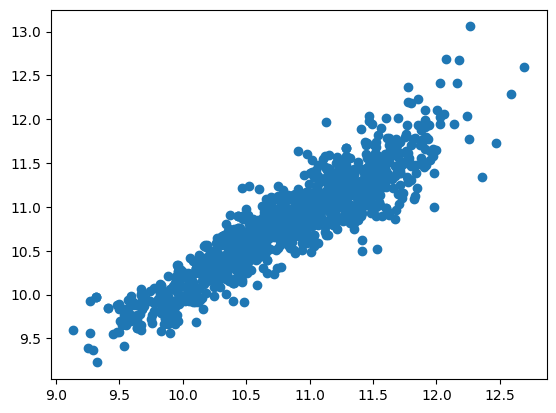

In [243]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')
step2=LinearRegression()
pipe=Pipeline([('step1',step1),
               ('step2',step2)])
pipe.fit(X_train,Y_train)
Y_pred=pipe.predict(X_test)
lr_r2=r2_score(Y_test,Y_pred)
print("R2 Score is ",r2_score(Y_test,Y_pred))
print("MAE is ",mean_absolute_error(Y_test,Y_pred))
plt.scatter(Y_train,pipe.predict(X_train))

<h3><b>Ridge Regression

R2 Score is  0.8113979580824282
MAE is  0.21061634502434995


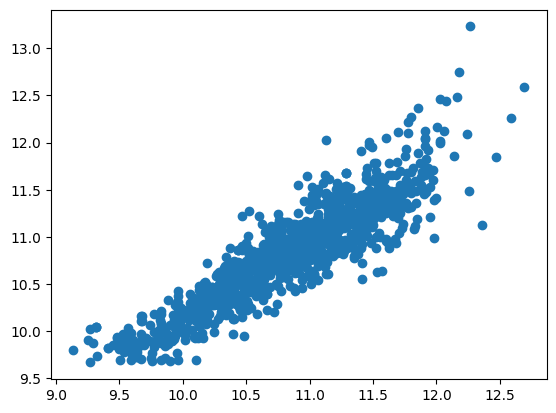

In [248]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')
#for i in range(1,50):
step2=Ridge(alpha=25)
pipe=Pipeline([('step1',step1),
               ('step2',step2)])
pipe.fit(X_train,Y_train)
Y_pred=pipe.predict(X_test)
ridge_r2=r2_score(Y_test,Y_pred)
print("R2 Score is ",r2_score(Y_test,Y_pred))
print("MAE is ",mean_absolute_error(Y_test,Y_pred))
plt.scatter(Y_train,pipe.predict(X_train))

<h3><b>Lasso Regression

R2 Score is  0.8082795204138098
MAE is  0.20991658075074413


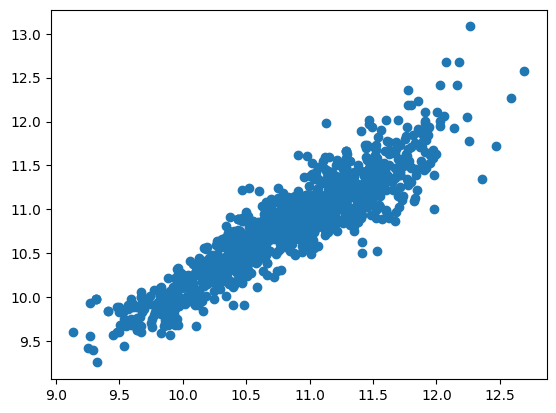

In [257]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')
step2=Lasso(alpha=0.0001)
pipe=Pipeline([('step1',step1),
               ('step2',step2)])
pipe.fit(X_train,Y_train)
Y_pred=pipe.predict(X_test)
lasso_r2=r2_score(Y_test,Y_pred)
print("R2 Score is ",r2_score(Y_test,Y_pred))
print("MAE is ",mean_absolute_error(Y_test,Y_pred))
plt.scatter(Y_train,pipe.predict(X_train))

<h3><b>K Nearest Neighbours

R2 Score is  0.854471532389379
MAE is  0.1743870884765787


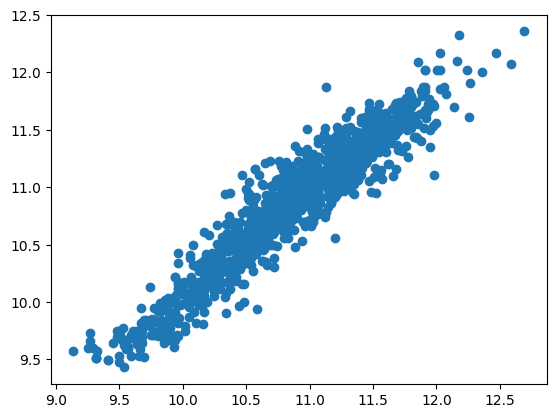

In [258]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')
step2=KNeighborsRegressor()
pipe=Pipeline([('step1',step1),
               ('step2',step2)])
pipe.fit(X_train,Y_train)
Y_pred=pipe.predict(X_test)
knn_r2=r2_score(Y_test,Y_pred)
print("R2 Score is ",r2_score(Y_test,Y_pred))
print("MAE is ",mean_absolute_error(Y_test,Y_pred))
plt.scatter(Y_train,pipe.predict(X_train))

<h3><b> Random Forest

R2 Score is  0.8849700863729978
MAE is  0.1564937508054988


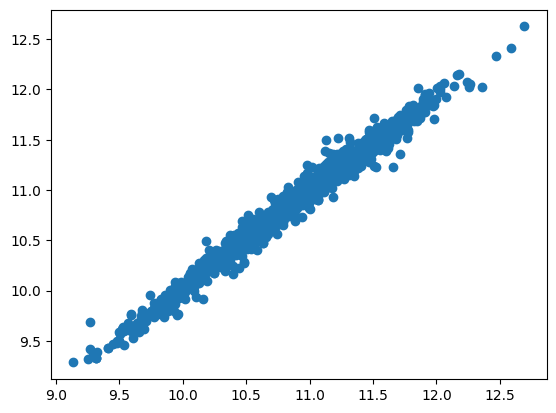

In [259]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')
step2=RandomForestRegressor()
pipe=Pipeline([('step1',step1),
               ('step2',step2)])
pipe.fit(X_train,Y_train)
Y_pred=pipe.predict(X_test)
rf_r2=r2_score(Y_test,Y_pred)
print("R2 Score is ",r2_score(Y_test,Y_pred))
print("MAE is ",mean_absolute_error(Y_test,Y_pred))
plt.scatter(Y_train,pipe.predict(X_train))

<h3><b>Decision Tree Regressor

R2 Score is  0.8413186441767923
MAE is  0.18699615701069805


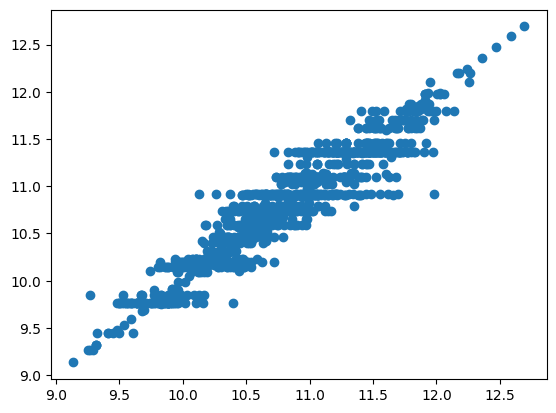

In [265]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')
step2=DecisionTreeRegressor( max_depth=7)
pipe=Pipeline([('step1',step1),
               ('step2',step2)])
pipe.fit(X_train,Y_train)
Y_pred=pipe.predict(X_test)
dt_r2=r2_score(Y_test,Y_pred)
print("R2 Score is ",r2_score(Y_test,Y_pred))
print("MAE is ",mean_absolute_error(Y_test,Y_pred))
plt.scatter(Y_train,pipe.predict(X_train))

<h3><b>SVM

R2 Score is  0.8840154532099841
MAE is  0.16658988978135728


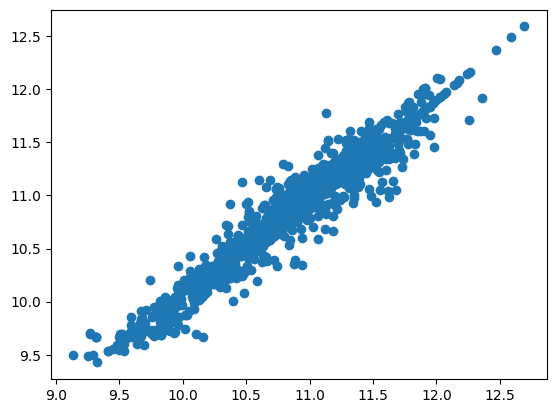

In [266]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')
step2=SVR()
pipe=Pipeline([('step1',step1),
               ('step2',step2)])
pipe.fit(X_train,Y_train)
Y_pred=pipe.predict(X_test)
svm_r2=r2_score(Y_test,Y_pred)
print("R2 Score is ",r2_score(Y_test,Y_pred))
print("MAE is ",mean_absolute_error(Y_test,Y_pred))
plt.scatter(Y_train,pipe.predict(X_train))

<h2><b>Model Evaluation</h2>

In [268]:
model=pd.DataFrame({'Models':['Linear Regression','Ridge Regressions','Lasso Regression','SVM','KNN','Decision Tree Regeressor','Random Forest Regressor'],
'R2_Score':[lr_r2,ridge_r2,lasso_r2,svm_r2,knn_r2,dt_r2,rf_r2]})

In [269]:
model

,Models,R2_Score
0,Linear Regression,0.808456
1,Ridge Regressions,0.811398
2,Lasso Regression,0.808280
3,SVM,0.884015
4,KNN,0.854472
5,Decision Tree Regeressor,0.841319
6,Random Forest Regressor,0.884970


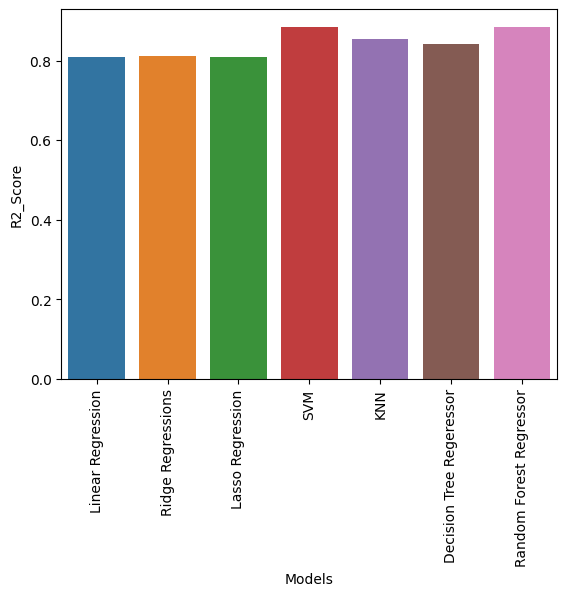

In [272]:
sns.barplot(x=model['Models'],y=model['R2_Score'],hue=model['Models'])
plt.xticks(rotation='vertical')
plt.show()